In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [3]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
import datetime as dt
from datetime import timedelta


june_temps = dt.date(2016, 6, 30)
june_temps = dt.date(2016, 6, 30) - dt.timedelta(days=29)

july_temps = dt.date(2016, 7, 30) - dt.timedelta(days=30)

session.query()
session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date >= june_temps).\
filter(Measurement.date <= july_temps).all()

[('2016-06-01', 76.0),
 ('2016-06-02', 71.0),
 ('2016-06-03', 71.0),
 ('2016-06-04', 74.0),
 ('2016-06-05', 76.0),
 ('2016-06-06', 78.0),
 ('2016-06-07', 77.0),
 ('2016-06-08', 77.0),
 ('2016-06-09', 73.0),
 ('2016-06-10', 77.0),
 ('2016-06-11', 78.0),
 ('2016-06-12', 78.0),
 ('2016-06-13', 80.0),
 ('2016-06-14', 79.0),
 ('2016-06-15', 78.0),
 ('2016-06-16', 77.0),
 ('2016-06-17', 76.0),
 ('2016-06-18', 77.0),
 ('2016-06-19', 77.0),
 ('2016-06-20', 78.0),
 ('2016-06-21', 80.0),
 ('2016-06-22', 79.0),
 ('2016-06-23', 79.0),
 ('2016-06-24', 77.0),
 ('2016-06-25', 78.0),
 ('2016-06-26', 79.0),
 ('2016-06-27', 80.0),
 ('2016-06-28', 76.0),
 ('2016-06-29', 79.0),
 ('2016-06-30', 80.0),
 ('2016-06-01', 70.0),
 ('2016-06-02', 69.0),
 ('2016-06-03', 70.0),
 ('2016-06-04', 68.0),
 ('2016-06-05', 70.0),
 ('2016-06-06', 74.0),
 ('2016-06-07', 75.0),
 ('2016-06-08', 74.0),
 ('2016-06-09', 71.0),
 ('2016-06-10', 73.0),
 ('2016-06-11', 75.0),
 ('2016-06-12', 74.0),
 ('2016-06-13', 76.0),
 ('2016-06-

In [6]:
# 2. Convert the June temperatures to a list.
june_temps_results = []
june_temps_results = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date >= june_temps).\
filter(Measurement.date <= july_temps).all()
print(june_temps_results)

[('2016-06-01', 76.0), ('2016-06-02', 71.0), ('2016-06-03', 71.0), ('2016-06-04', 74.0), ('2016-06-05', 76.0), ('2016-06-06', 78.0), ('2016-06-07', 77.0), ('2016-06-08', 77.0), ('2016-06-09', 73.0), ('2016-06-10', 77.0), ('2016-06-11', 78.0), ('2016-06-12', 78.0), ('2016-06-13', 80.0), ('2016-06-14', 79.0), ('2016-06-15', 78.0), ('2016-06-16', 77.0), ('2016-06-17', 76.0), ('2016-06-18', 77.0), ('2016-06-19', 77.0), ('2016-06-20', 78.0), ('2016-06-21', 80.0), ('2016-06-22', 79.0), ('2016-06-23', 79.0), ('2016-06-24', 77.0), ('2016-06-25', 78.0), ('2016-06-26', 79.0), ('2016-06-27', 80.0), ('2016-06-28', 76.0), ('2016-06-29', 79.0), ('2016-06-30', 80.0), ('2016-06-01', 70.0), ('2016-06-02', 69.0), ('2016-06-03', 70.0), ('2016-06-04', 68.0), ('2016-06-05', 70.0), ('2016-06-06', 74.0), ('2016-06-07', 75.0), ('2016-06-08', 74.0), ('2016-06-09', 71.0), ('2016-06-10', 73.0), ('2016-06-11', 75.0), ('2016-06-12', 74.0), ('2016-06-13', 76.0), ('2016-06-14', 76.0), ('2016-06-15', 76.0), ('2016-06

In [7]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd

june_temps_df = pd.DataFrame(june_temps_results, columns=['Date','June temps'])
# Set the index to the date column
june_temps_df.set_index(june_temps_df['Date'], inplace=True)
# Sort the dataframe by date
june_temps_df = june_temps_df.sort_index()
print(june_temps_df.to_string(index=False))

      Date  June temps
2016-06-01        76.0
2016-06-01        70.0
2016-06-01        70.0
2016-06-01        69.0
2016-06-01        75.0
2016-06-01        64.0
2016-06-01        71.0
2016-06-02        65.0
2016-06-02        69.0
2016-06-02        75.0
2016-06-02        71.0
2016-06-02        71.0
2016-06-02        67.0
2016-06-02        74.0
2016-06-03        70.0
2016-06-03        71.0
2016-06-03        70.0
2016-06-03        75.0
2016-06-03        68.0
2016-06-03        75.0
2016-06-03        75.0
2016-06-04        65.0
2016-06-04        74.0
2016-06-04        68.0
2016-06-04        75.0
2016-06-05        70.0
2016-06-05        73.0
2016-06-05        73.0
2016-06-05        70.0
2016-06-05        76.0
2016-06-06        72.0
2016-06-06        74.0
2016-06-06        76.0
2016-06-06        78.0
2016-06-06        72.0
2016-06-06        78.0
2016-06-07        77.0
2016-06-07        75.0
2016-06-07        74.0
2016-06-07        78.0
2016-06-07        77.0
2016-06-07        71.0
2016-06-07 

In [36]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June temps
count,194.000000
mean,75.175258
std,3.421996
min,64.000000
25%,73.000000
50%,75.500000
75%,78.000000
max,81.000000


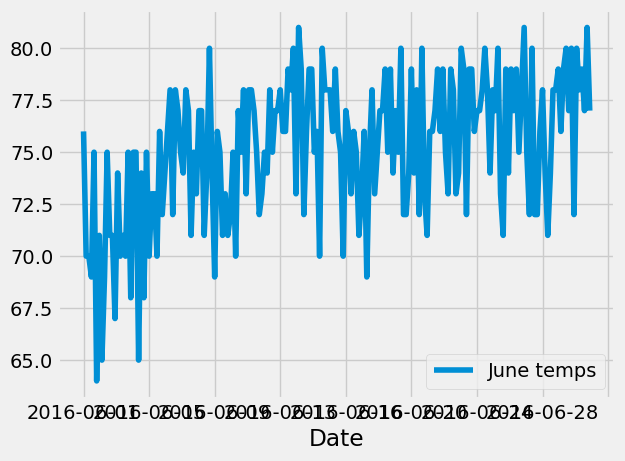

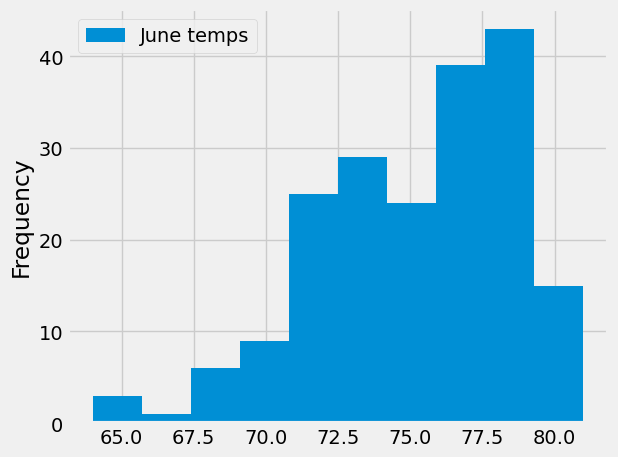

In [38]:
# Plot June temps data, line chart and histogram.

june_temps_df.plot()

june_temps_df.plot.hist(bins=10)
plt.tight_layout()

In [ ]:
# 5. Return to your challenge instructions to compare your summary statistics

[('2016-06-01', 0.06), ('2016-06-02', 0.0), ('2016-06-03', 0.0), ('2016-06-04', 0.0), ('2016-06-05', 0.0), ('2016-06-06', 0.0), ('2016-06-07', 0.01), ('2016-06-08', 0.0), ('2016-06-09', 0.01), ('2016-06-10', 0.05), ('2016-06-11', 0.0), ('2016-06-12', 0.01), ('2016-06-13', 0.0), ('2016-06-14', 0.0), ('2016-06-15', 0.01), ('2016-06-16', 0.02), ('2016-06-17', 0.02), ('2016-06-18', 0.0), ('2016-06-19', 0.01), ('2016-06-20', 0.01), ('2016-06-21', 0.0), ('2016-06-22', 0.0), ('2016-06-23', 0.0), ('2016-06-24', 0.01), ('2016-06-25', 0.03), ('2016-06-26', 0.01), ('2016-06-27', 0.01), ('2016-06-28', 0.0), ('2016-06-29', 0.0), ('2016-06-30', 0.0), ('2016-06-01', 0.89), ('2016-06-02', 0.15), ('2016-06-03', 0.16), ('2016-06-04', 0.0), ('2016-06-05', 0.63), ('2016-06-06', 0.36), ('2016-06-07', 0.4), ('2016-06-08', 0.0), ('2016-06-09', 0.21), ('2016-06-10', 0.06), ('2016-06-11', 0.02), ('2016-06-12', 0.04), ('2016-06-13', 0.08), ('2016-06-14', 0.06), ('2016-06-15', 0.18), ('2016-06-16', 0.03), ('2016

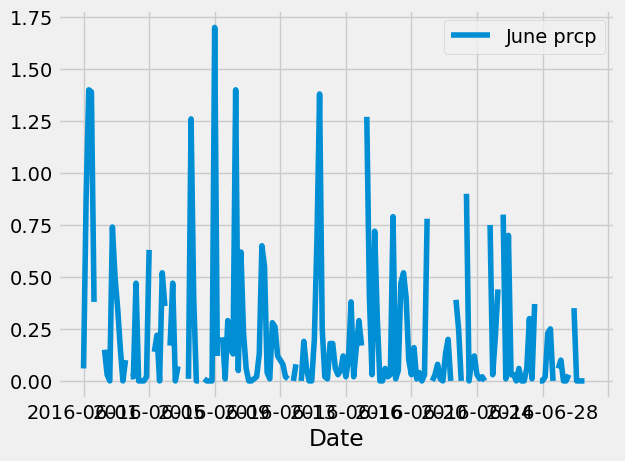

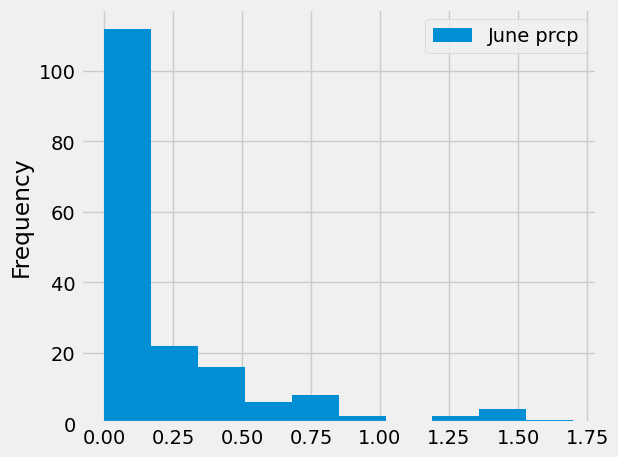

In [29]:
# Plot June precipitation data, line chart and histogram. 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

june_prcp = dt.date(2016, 6, 30)
june_prcp = dt.date(2016, 6, 30) - dt.timedelta(days=29)

july_prcp = dt.date(2016, 7, 30) - dt.timedelta(days=30)

session.query()
session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= june_prcp).\
filter(Measurement.date <= july_prcp).all()


june_prcp_results = []
june_prcp_results = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= june_prcp).\
filter(Measurement.date <= july_prcp).all()
print(june_prcp_results)


import pandas as pd

june_prcp_df = pd.DataFrame(june_prcp_results, columns=['Date','June prcp'])
# Set the index to the date column
june_prcp_df.set_index(june_prcp_df['Date'], inplace=True)
# Sort the dataframe by date
june_prcp_df = june_prcp_df.sort_index()
print(june_prcp_df.to_string(index=False))

june_prcp_df.describe()

june_prcp_df.plot()

june_prcp_df.plot.hist(bins=10)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [21]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps = dt.date(2016, 12, 31)
december_temps = dt.date(2016, 12, 31) - dt.timedelta(days=30)

january_temps = dt.date(2017, 1, 31) - dt.timedelta(days=31)

session.query()
session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date >= december_temps).\
filter(Measurement.date <= january_temps).all()

[('2016-12-01', 75.0),
 ('2016-12-02', 72.0),
 ('2016-12-03', 69.0),
 ('2016-12-04', 71.0),
 ('2016-12-05', 68.0),
 ('2016-12-06', 67.0),
 ('2016-12-07', 69.0),
 ('2016-12-08', 73.0),
 ('2016-12-09', 70.0),
 ('2016-12-10', 70.0),
 ('2016-12-11', 70.0),
 ('2016-12-12', 66.0),
 ('2016-12-13', 67.0),
 ('2016-12-14', 70.0),
 ('2016-12-15', 66.0),
 ('2016-12-16', 62.0),
 ('2016-12-17', 71.0),
 ('2016-12-18', 73.0),
 ('2016-12-19', 69.0),
 ('2016-12-20', 77.0),
 ('2016-12-21', 74.0),
 ('2016-12-22', 71.0),
 ('2016-12-23', 72.0),
 ('2016-12-24', 74.0),
 ('2016-12-25', 74.0),
 ('2016-12-26', 74.0),
 ('2016-12-27', 74.0),
 ('2016-12-28', 71.0),
 ('2016-12-29', 73.0),
 ('2016-12-30', 69.0),
 ('2016-12-31', 66.0),
 ('2016-12-01', 73.0),
 ('2016-12-02', 71.0),
 ('2016-12-03', 71.0),
 ('2016-12-04', 69.0),
 ('2016-12-05', 68.0),
 ('2016-12-06', 70.0),
 ('2016-12-07', 71.0),
 ('2016-12-08', 72.0),
 ('2016-12-09', 70.0),
 ('2016-12-10', 71.0),
 ('2016-12-11', 72.0),
 ('2016-12-12', 68.0),
 ('2016-12-

In [22]:
# 7. Convert the December temperatures to a list.
december_temps_results = []
december_temps_results = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date >= december_temps).\
filter(Measurement.date <= january_temps).all()
print(december_temps_results)

[('2016-12-01', 75.0), ('2016-12-02', 72.0), ('2016-12-03', 69.0), ('2016-12-04', 71.0), ('2016-12-05', 68.0), ('2016-12-06', 67.0), ('2016-12-07', 69.0), ('2016-12-08', 73.0), ('2016-12-09', 70.0), ('2016-12-10', 70.0), ('2016-12-11', 70.0), ('2016-12-12', 66.0), ('2016-12-13', 67.0), ('2016-12-14', 70.0), ('2016-12-15', 66.0), ('2016-12-16', 62.0), ('2016-12-17', 71.0), ('2016-12-18', 73.0), ('2016-12-19', 69.0), ('2016-12-20', 77.0), ('2016-12-21', 74.0), ('2016-12-22', 71.0), ('2016-12-23', 72.0), ('2016-12-24', 74.0), ('2016-12-25', 74.0), ('2016-12-26', 74.0), ('2016-12-27', 74.0), ('2016-12-28', 71.0), ('2016-12-29', 73.0), ('2016-12-30', 69.0), ('2016-12-31', 66.0), ('2016-12-01', 73.0), ('2016-12-02', 71.0), ('2016-12-03', 71.0), ('2016-12-04', 69.0), ('2016-12-05', 68.0), ('2016-12-06', 70.0), ('2016-12-07', 71.0), ('2016-12-08', 72.0), ('2016-12-09', 70.0), ('2016-12-10', 71.0), ('2016-12-11', 72.0), ('2016-12-12', 68.0), ('2016-12-13', 68.0), ('2016-12-14', 70.0), ('2016-12

In [23]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temps_df = pd.DataFrame(december_temps_results, columns=['Date','December temps'])
# Set the index to the date column
december_temps_df.set_index(december_temps_df['Date'], inplace=True)
# Sort the dataframe by date
december_temps_df = december_temps_df.sort_index()
print(december_temps_df.to_string(index=False))

      Date  December temps
2016-12-01            75.0
2016-12-01            76.0
2016-12-01            75.0
2016-12-01            74.0
2016-12-01            73.0
2016-12-01            71.0
2016-12-01            72.0
2016-12-02            71.0
2016-12-02            70.0
2016-12-02            70.0
2016-12-02            72.0
2016-12-02            75.0
2016-12-02            77.0
2016-12-02            71.0
2016-12-03            75.0
2016-12-03            72.0
2016-12-03            75.0
2016-12-03            67.0
2016-12-03            69.0
2016-12-03            71.0
2016-12-04            76.0
2016-12-04            77.0
2016-12-04            69.0
2016-12-04            71.0
2016-12-04            75.0
2016-12-04            70.0
2016-12-05            68.0
2016-12-05            68.0
2016-12-05            67.0
2016-12-05            67.0
2016-12-05            76.0
2016-12-05            68.0
2016-12-05            70.0
2016-12-06            67.0
2016-12-06            67.0
2016-12-06            70.0
2

In [24]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temps_df.describe()

,December temps
count,200.000000
mean,71.130000
std,3.419292
min,60.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,78.000000


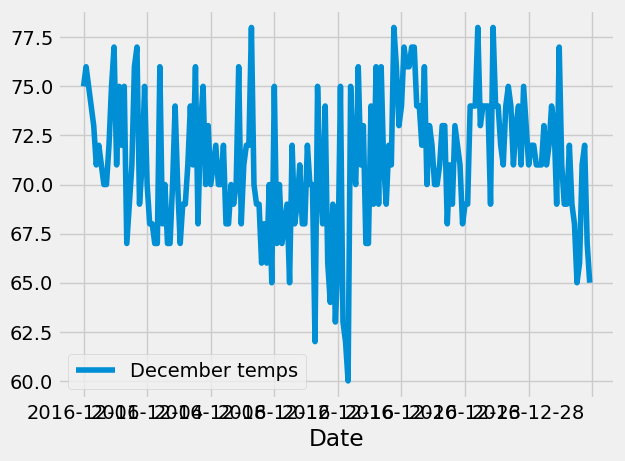

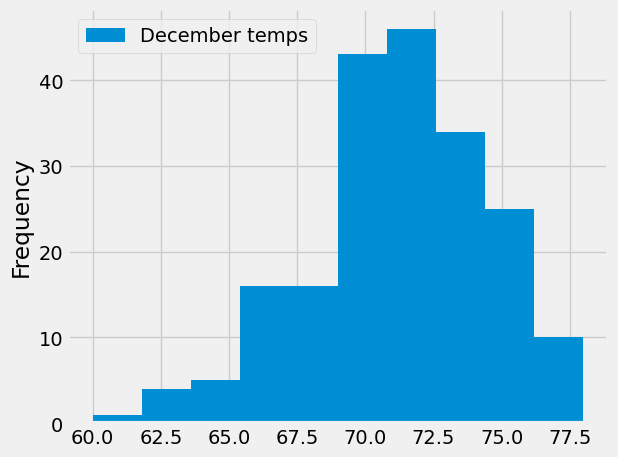

In [27]:
# Plot data, line chart and histogram.

december_temps_df.plot()

december_temps_df.plot.hist(bins=10)
plt.tight_layout()

In [ ]:
# 10. Return to your challenge instructions to compare your summary statistics

[('2016-12-01', 0.12), ('2016-12-02', 0.03), ('2016-12-03', 0.0), ('2016-12-04', 0.03), ('2016-12-05', 0.43), ('2016-12-06', 0.02), ('2016-12-07', 0.0), ('2016-12-08', 0.03), ('2016-12-09', 0.52), ('2016-12-10', 0.05), ('2016-12-11', 0.04), ('2016-12-12', 0.01), ('2016-12-13', 0.05), ('2016-12-14', 0.03), ('2016-12-15', 0.0), ('2016-12-16', 0.0), ('2016-12-17', 0.01), ('2016-12-18', 0.13), ('2016-12-19', 0.01), ('2016-12-20', 0.0), ('2016-12-21', 0.0), ('2016-12-22', 0.01), ('2016-12-23', 0.01), ('2016-12-24', 0.01), ('2016-12-25', 0.0), ('2016-12-26', 0.02), ('2016-12-27', 0.0), ('2016-12-28', 0.02), ('2016-12-29', 0.04), ('2016-12-30', 0.12), ('2016-12-31', 0.01), ('2016-12-01', 0.33), ('2016-12-02', 0.3), ('2016-12-03', 0.04), ('2016-12-04', 0.1), ('2016-12-05', 0.34), ('2016-12-06', 0.02), ('2016-12-07', 0.17), ('2016-12-08', 0.03), ('2016-12-09', 0.34), ('2016-12-10', 0.02), ('2016-12-11', 0.02), ('2016-12-12', 0.01), ('2016-12-13', 0.1), ('2016-12-14', 0.05), ('2016-12-15', 0.02)

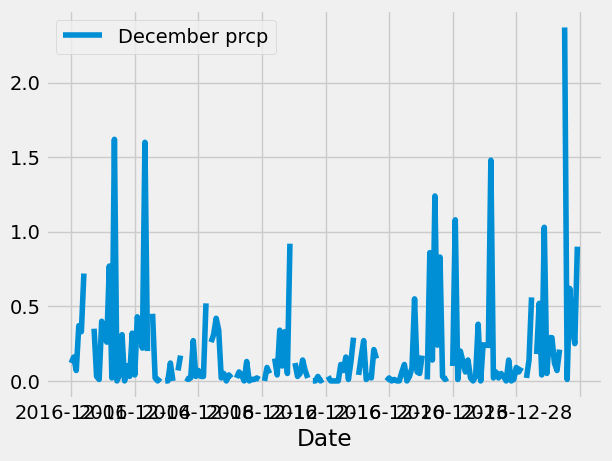

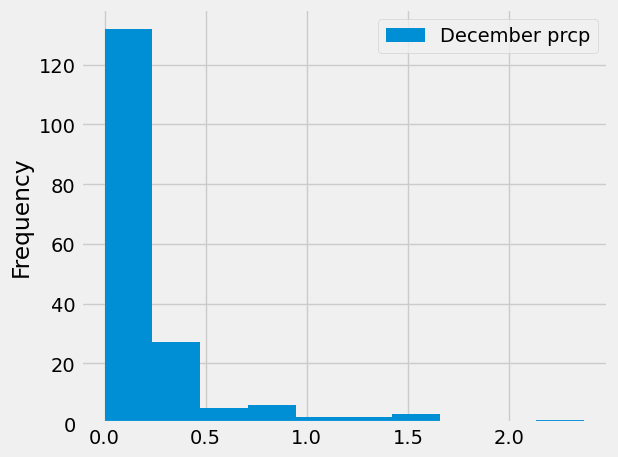

In [32]:
# Plot December precipitation data, line chart and histogram. 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

december_prcp = dt.date(2016, 12, 31)
december_prcp = dt.date(2016, 12, 31) - dt.timedelta(days=30)

january_prcp = dt.date(2017, 1, 31) - dt.timedelta(days=31)

session.query()
session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= december_prcp).\
filter(Measurement.date <= january_prcp).all()


december_prcp_results = []
december_prcp_results = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= december_prcp).\
filter(Measurement.date <= january_prcp).all()
print(december_prcp_results)


import pandas as pd

december_prcp_df = pd.DataFrame(december_prcp_results, columns=['Date','December prcp'])
# Set the index to the date column
december_prcp_df.set_index(december_prcp_df['Date'], inplace=True)
# Sort the dataframe by date
december_prcp_df = december_prcp_df.sort_index()
print(december_prcp_df.to_string(index=False))

december_prcp_df.describe()

december_prcp_df.plot()

december_prcp_df.plot.hist(bins=10)
plt.tight_layout()